In [80]:
##Visualizing Word Embeddings using t-SNE (train wordembeeding on the COCO-text vs general word embedding)
## original code from https://github.com/sismetanin/word2vec-tsne

In [75]:
import gensim
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [77]:
OUTPUT_FILE_PATH = 'w2v_model_w2.bin'

In [32]:
model = KeyedVectors.load(OUTPUT_FILE_PATH)

In [33]:
keys = ['st','stop','kia','tennis','airways','12', 'car','parking', 'shop']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    #for similar_word, _ in model_gn.most_similar(word, topn=30):
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [34]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=13, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

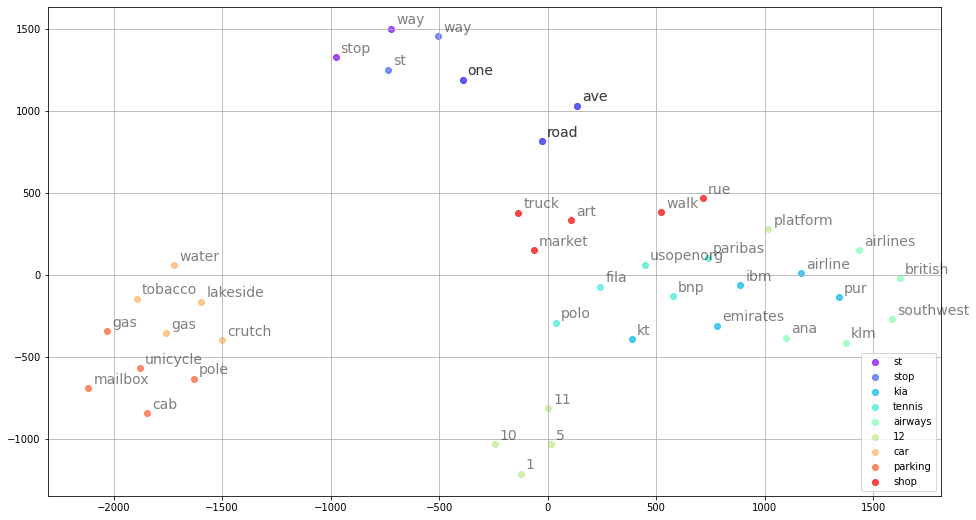

In [37]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='left', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    #plt.grid(False)
    
    if filename:
        # try to make it better in term of quality. 
        plt.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')
        # original size
        #plt.savefig(filename, format='pdf', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.pdf')

In [55]:
# General word embedding 

In [61]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

In [62]:
OUTPUT_FILE_PATH_2 = 'glove.840B.300d.txt'
#from gensim.keyedvectors import KeyedVectors

In [63]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file=OUTPUT_FILE_PATH_2, word2vec_output_file="gensim_glove_vectors.txt")

(2196017, 300)

In [64]:
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [65]:
keys = ['st','stop','kia','tennis','airways','12', 'car','parking', 'shop']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    #for similar_word, _ in model_gn.most_similar(word, topn=30):
    for similar_word, _ in glove_model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [70]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=13, n_components=2, init='pca', n_iter=3500, random_state=32)
#tsne_model_en_2d = TSNE(perplexity=7, n_components=2, init='pca', n_iter=3500, random_state=7)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

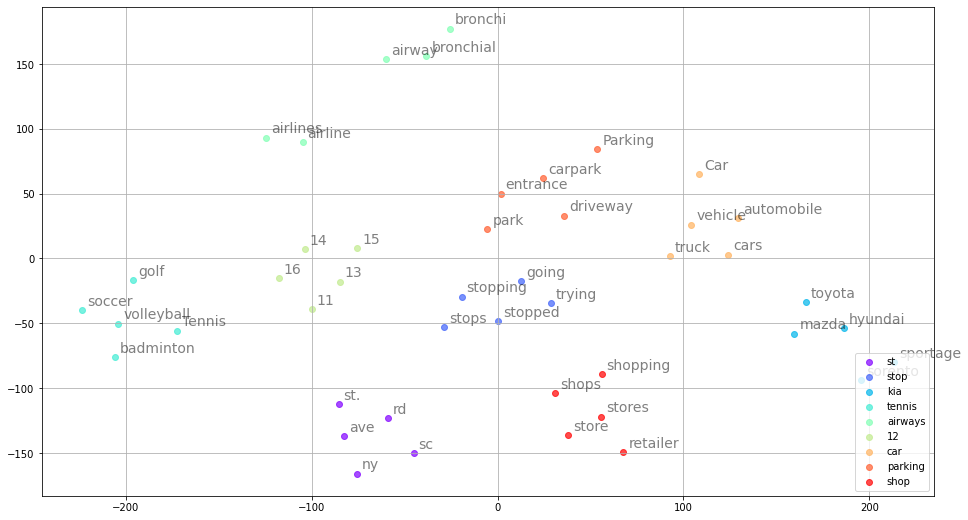

In [71]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='left', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    #plt.grid(False)
    
    if filename:
        # try to make it better in term of quality. 
        plt.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')
        # original size
        #plt.savefig(filename, format='pdf', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.pdf')